In [ ]:
import gym
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict
from functools import partial
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
env = gym.make('Blackjack-v1')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
def sample_policy(observation):
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

In [ ]:
def generate_episode(policy, env):

    states, actions, rewards = [], [], []

    observation = env.reset()

    while True:

        states.append(observation)

        action = sample_policy(observation)
        actions.append(action)

        observation, reward, done, info = env.step(action)
        rewards.append(reward)

        if done:
             break

    return states, actions, rewards

In [ ]:
def first_visit_mc_prediction(policy, env, n_episodes):

    value_table = defaultdict(float)
    N = defaultdict(int)


    for _ in range(n_episodes):

        states, _, rewards = generate_episode(policy, env)
        returns = 0

        for t in range(len(states) - 1, -1, -1):
            R = rewards[t]
            S = states[t]

            returns += R

            if S not in states[:t]:
                N[S] += 1
                value_table[S] += (returns - value_table[S]) / N[S]

    return value_table

In [ ]:
value = first_visit_mc_prediction(sample_policy, env, n_episodes=500000)

In [ ]:
for i in range(10):
  print(value.popitem())

((12, 5, True), -0.23360655737704922)
((12, 6, True), -0.2772727272727275)
((4, 6, False), -0.5090909090909096)
((12, 4, True), -0.2543859649122806)
((12, 9, True), -0.1659919028340081)
((4, 1, False), -0.6358974358974357)
((15, 5, True), -0.3214285714285713)
((4, 5, False), -0.4736842105263157)
((14, 4, True), -0.2704761904761903)
((4, 8, False), -0.47234042553191485)


In [ ]:
def plot_blackjack(V, ax1, ax2):
    player_sum = np.arange(12, 21 + 1)
    dealer_show = np.arange(1, 10 + 1)
    usable_ace = np.array([False, True])
    state_values = np.zeros((len(player_sum), len(dealer_show), len(usable_ace)))

    for i, player in enumerate(player_sum):
        for j, dealer in enumerate(dealer_show):
            for k, ace in enumerate(usable_ace):
                state_values[i, j, k] = V[player, dealer, ace]

    X, Y = np.meshgrid(player_sum, dealer_show)

    ax1.plot_wireframe(X, Y, state_values[:, :, 0])
    ax2.plot_wireframe(X, Y, state_values[:, :, 1])

    for ax in ax1, ax2:
        ax.set_zlim(-1, 1)
        ax.set_ylabel('player sum')
        ax.set_xlabel('dealer showing')
        ax.set_zlabel('state-value')


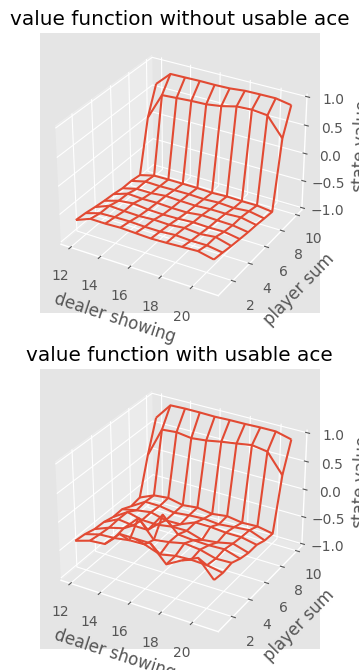

In [ ]:
fig, axes = pyplot.subplots(nrows=2, figsize=(5, 8),
subplot_kw={'projection': '3d'})
axes[0].set_title('value function without usable ace')
axes[1].set_title('value function with usable ace')
plot_blackjack(value, axes[0], axes[1])